# Linear Regression

`In this exercise, we will extract the four fundamental notions for
supervised learning, through an example of linear regression on
two-dimensional data.`


In [27]:
# Import the necessary packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression


# 1. Dataset : (X, y) ;  m = 100,  n = 1

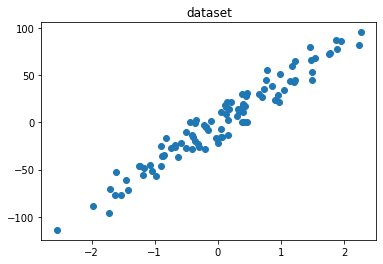

In [28]:
np.random.seed(0)
x, y = make_regression(n_samples=100, n_features=1, noise=10)

# show the dataset
plt.title("dataset")
fig_1 = plt.scatter(x, y)

In [29]:
# Transform the dataset into matrices.
# That is used for writing the equations in the matrix form.
X = np.hstack((x, np.ones(x.shape)))
y = y.reshape(y.shape[0], 1)

# 2. Model :

- Linear function : $$ f(x) = a x + b $$

- The role of the machine is to find the parameters $a$ and $b$

- In the matrix form:
$$F = X \theta ; \quad \text{with} \quad X = \left[\begin{array}{ccc}x^{1} & 1 \\ \vdots & \vdots\\ x^{m} & 1\end{array}\right] \quad \text{and} \quad \theta = \left[\begin{array}{ccc}a \\ b \end{array}\right]$$

In [30]:
def model(X, theta):
    """ This function returns the linear model

    """
    return X @ theta

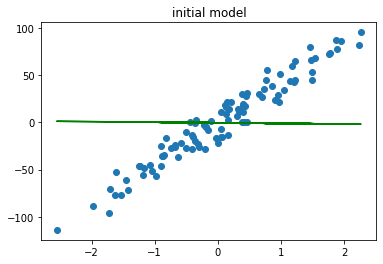

In [31]:
# initial parameters
init_theta = np.random.randn(2, 1)

# initial model
init_model = model(X, init_theta)

# plot initial model
plt.title("initial model")
plt.scatter(x, y)
fig_2 = plt.plot(x, init_model, c='g')

# 3. Cost function :

- Residual sum of squares : $$ J(a, b) = \frac{1}{2m} \sum_{i = 1}^{m} \left(f(x^{(i)}) - y^{(i)}\right)^2 $$
- The object of this program is to minimize this function.
- In the matrix form: $$ J = \frac{1}{2m} \sum \left(X\theta - y\right)^2 $$

In [32]:
def cost_function(X, y, theta):
    """ Returns the cost function for our model.

    """
    # Residual sum of squares
    rss = np.sum((X @ theta - y) ** 2)

    # Number of rows times 2
    nb_rows_x2 = 2 * X.shape[0]

    return rss / nb_rows_x2

In [33]:
# show cost function for initial parameters
print(cost_function(X, y, init_theta))

1009.8259477174702


# 4. Minimization algorithm :

- gradient descent algorithm : $$ \theta = \theta - \alpha \; \nabla J(\theta) $$
- gradient : $$ \nabla J(\theta) = \nabla J(a, b) = \left[\begin{array}{ccc} \frac{\partial J(a, b)}{\partial a} \\ \frac{\partial J(a, b)}{\partial b} \end{array}\right] = \frac{}{} X^{T} \left(X \theta - y\right)$$

In [34]:
def gradient(X, y, theta):
    """ Returns gradient of a function.

    """
    return X.T @ (X @ theta - y) / X.shape[0]


def gradient_descent(X, y, theta, learn_rate, nb_iterations):
    """ Finding a local minimum of a differentiable function by gradient
    descent algorithm.

    """

    # Cost history
    cost_tracking = np.zeros(nb_iterations)

    for _i in range(nb_iterations):
        theta -= learn_rate * gradient(X, y, theta)
        # recording the cost for each iteration
        cost_tracking[_i] = cost_function(X, y, theta)

    return theta, cost_tracking

## 4.1 Training

57.08574532796593


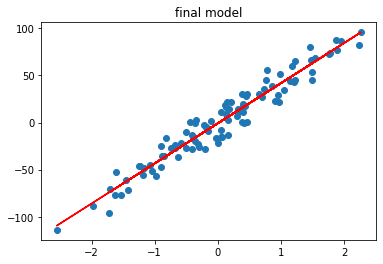

In [35]:
# learning rate
learn_rate = 0.01

# number of iterations
number_iterations = 1_000

# final parameters for our model
final_params, cost_tracking = gradient_descent(
    X, y, init_theta, learn_rate, number_iterations)

# final model
final_model = model(X, final_params)

# show cost function for final parameters
print(cost_function(X, y, final_params))

# plot final model
plt.title("final model")
plt.scatter(x, y)
fig_3 = plt.plot(x, final_model, c='r')

## 4.2 learning curve 

Text(0.5, 1.0, 'cost tracking')

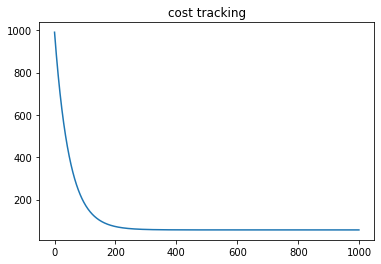

In [36]:
# plot Cost history
fig_4 = plt.plot(range(number_iterations), cost_tracking)
plt.title("cost tracking")

## 4.3 Coefficient of determination

In [37]:
def coefficient_determination(y, prediction):
    """ Coefficient of determination.

    This function measures the quality of the prediction of linear regression.

    """
    sum_numerator = np.sum((y - prediction) ** 2)
    sum_denominator = np.sum((y - prediction.mean()) ** 2)
    return 1 - sum_numerator / sum_denominator

In [39]:
# show the coefficient of determination for our model
print(coefficient_determination(y, final_model))

0.9417294705102971
